In [1]:
import numpy as np
from pathlib import Path

import torch

from scripts.tools import load_pickle

import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DATA_PATH = Path('../data/')
random_seed = 54

In [2]:
text_probs = torch.load("../modalities_preds/predicted_probs_text.pt")
audio_probs = torch.load("../modalities_preds/predicted_probs_audio.pt")
video_probs = torch.load("../modalities_preds/predicted_probs_video.pt")
true_labels = torch.load("../modalities_preds/true_labels.pt")

AB

In [3]:
ab_new_probs = []

In [4]:
for i in range(len(text_probs)):
    ab_new_probs.append(np.mean([audio_probs[i][1].item(), video_probs[i][1].item()]))

In [5]:
ab_new_predicts = [1 if i > 0.5 else 0 for i in ab_new_probs]

Accuracy: 0.4973770491803279

Precision: 0.505121293800539

Recall: 0.6037371134020618



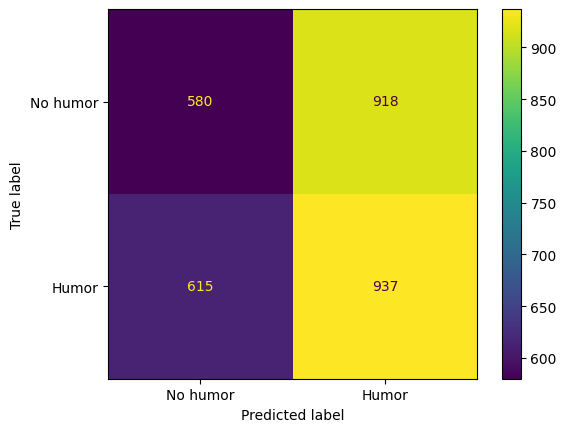

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, ab_new_predicts)}\n")
print(f"Precision: {precision_score(true_labels, ab_new_predicts)}\n")
print(f"Recall: {recall_score(true_labels, ab_new_predicts)}\n")
cnf = confusion_matrix(true_labels, ab_new_predicts)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

AT

In [11]:
at_new_probs = []

In [12]:
for i in range(len(text_probs)):
    at_new_probs.append(np.mean([audio_probs[i][1].item(), text_probs[i][1].item()]))

In [13]:
at_new_predicts = [1 if i > 0.5 else 0 for i in at_new_probs]

Accuracy: 0.7137704918032787

Precision: 0.7048883524441762

Recall: 0.7525773195876289



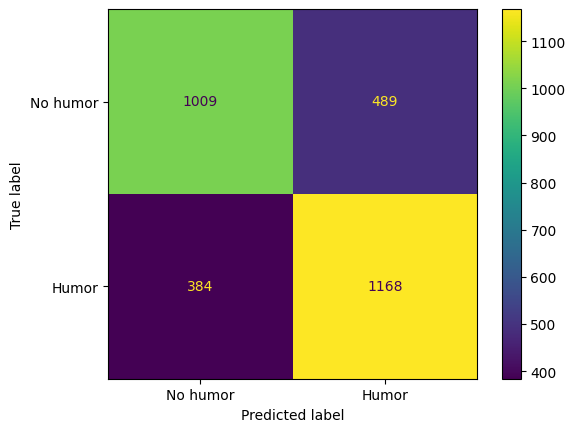

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, at_new_predicts)}\n")
print(f"Precision: {precision_score(true_labels, at_new_predicts)}\n")
print(f"Recall: {recall_score(true_labels, at_new_predicts)}\n")
cnf = confusion_matrix(true_labels, at_new_predicts)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

BT

In [15]:
bt_new_probs = []

In [16]:
for i in range(len(text_probs)):
    bt_new_probs.append(np.mean([video_probs[i][1].item(), text_probs[i][1].item()]))

In [17]:
bt_new_predicts = [1 if i > 0.5 else 0 for i in bt_new_probs]

Accuracy: 0.6357377049180328

Precision: 0.6356923076923077

Recall: 0.6655927835051546



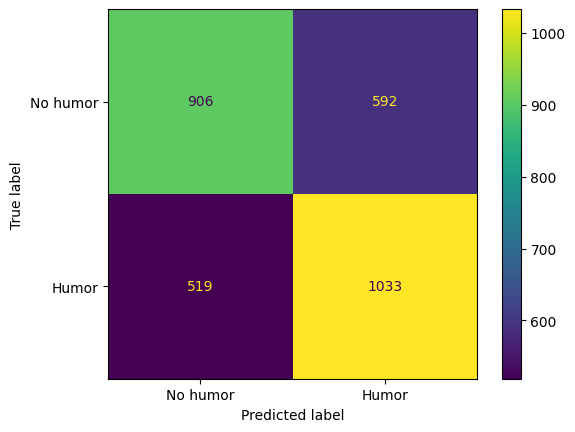

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, bt_new_predicts)}\n")
print(f"Precision: {precision_score(true_labels, bt_new_predicts)}\n")
print(f"Recall: {recall_score(true_labels, bt_new_predicts)}\n")
cnf = confusion_matrix(true_labels, bt_new_predicts)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

Summary of probabilities

In [4]:
abt_new_probs = []

In [5]:
for i in range(len(text_probs)):
    abt_new_probs.append(np.mean([text_probs[i][1].item(), audio_probs[i][1].item(), video_probs[i][1].item()]))
    

In [7]:
new_predicts = [1 if i > 0.5 else 0 for i in abt_new_probs]

Accuracy: 0.6308196721311475

Precision: 0.6286231884057971

Recall: 0.6707474226804123



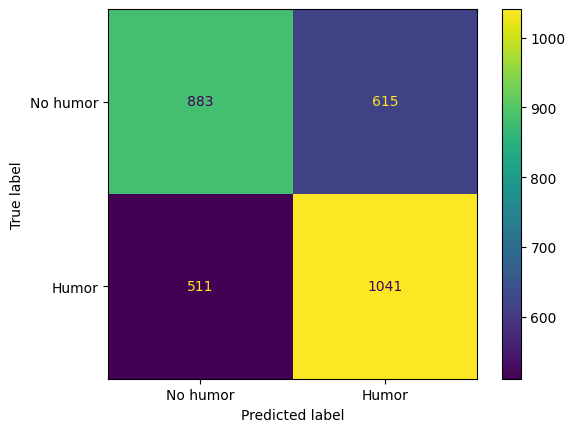

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, new_predicts)}\n")
print(f"Precision: {precision_score(true_labels, new_predicts)}\n")
print(f"Recall: {recall_score(true_labels, new_predicts)}\n")
cnf = confusion_matrix(true_labels, new_predicts)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

Class vote

AB


In [32]:
ab_votes = []

In [33]:
for i in range(len(text_probs)):
    if audio_probs[i][1] > 0.5 and audio_probs[i][1] > 0.5:
        ab_votes.append(1)
    if audio_probs[i][1] > 0.5 and audio_probs[i][1] < 0.5:
        ab_votes.append(1)
    if audio_probs[i][1] < 0.5 and audio_probs[i][1] > 0.5:
        ab_votes.append(0)
    if audio_probs[i][1] < 0.5 and audio_probs[i][1] < 0.5:
        ab_votes.append(0)

Accuracy: 0.5088524590163934

Precision: 0.5088524590163934

Recall: 1.0



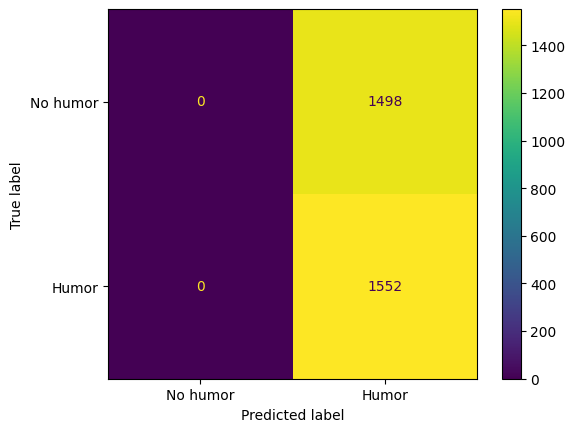

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, ab_votes)}\n")
print(f"Precision: {precision_score(true_labels, ab_votes)}\n")
print(f"Recall: {recall_score(true_labels, ab_votes)}\n")
cnf = confusion_matrix(true_labels, ab_votes)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

AT

In [23]:
at_votes = []

In [24]:
for i in range(len(text_probs)):
    if text_probs[i][1] > 0.5 and audio_probs[i][1] > 0.5:
        at_votes.append(1)
    if text_probs[i][1] > 0.5 and audio_probs[i][1] < 0.5:
        at_votes.append(1)
    if text_probs[i][1] < 0.5 and audio_probs[i][1] > 0.5:
        at_votes.append(0)
    if text_probs[i][1] < 0.5 and audio_probs[i][1] < 0.5:
        at_votes.append(0)

Accuracy: 0.7137704918032787

Precision: 0.705632949727438

Recall: 0.7506443298969072



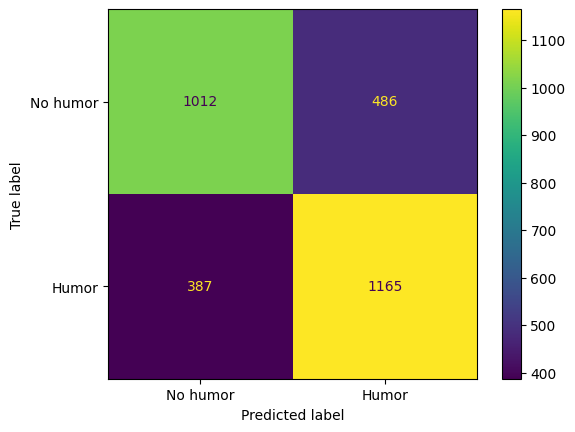

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, at_votes)}\n")
print(f"Precision: {precision_score(true_labels, at_votes)}\n")
print(f"Recall: {recall_score(true_labels, at_votes)}\n")
cnf = confusion_matrix(true_labels, at_votes)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

BT

In [29]:
bt_votes = []

In [30]:
for i in range(len(text_probs)):
    if text_probs[i][1] > 0.5 and video_probs[i][1] > 0.5:
        bt_votes.append(1)
    if text_probs[i][1] > 0.5 and video_probs[i][1] < 0.5:
        bt_votes.append(1)
    if text_probs[i][1] < 0.5 and video_probs[i][1] > 0.5:
        bt_votes.append(0)
    if text_probs[i][1] < 0.5 and video_probs[i][1] < 0.5:
        bt_votes.append(0)

Accuracy: 0.7137704918032787

Precision: 0.705632949727438

Recall: 0.7506443298969072



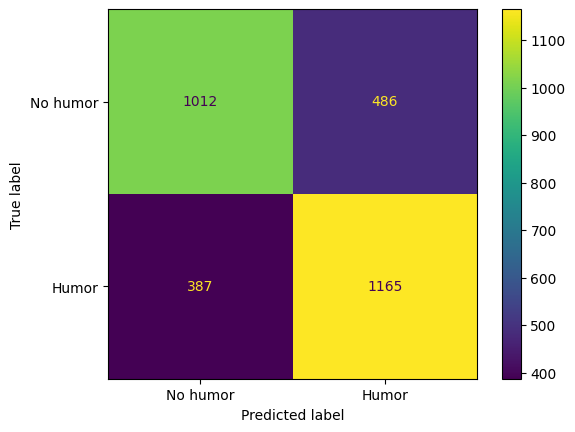

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, bt_votes)}\n")
print(f"Precision: {precision_score(true_labels, bt_votes)}\n")
print(f"Recall: {recall_score(true_labels, bt_votes)}\n")
cnf = confusion_matrix(true_labels, bt_votes)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()

ABT

In [19]:
votes = []

In [20]:
for i in range(len(text_probs)):
    if video_probs[i][1] > 0.5 and audio_probs[i][1] > 0.5:
        votes.append(1)
    if (video_probs[i][1] > 0.5 and audio_probs[i][1] < 0.5) or (video_probs[i][1] < 0.5 and audio_probs[i][1] > 0.5):
        if text_probs[i][1] > 0.5:
            votes.append(1)
        else:
            votes.append(0)
    if video_probs[i][1] < 0.5 and audio_probs[i][1] < 0.5:
        votes.append(0)

Accuracy: 0.5970491803278688

Precision: 0.5646776131357629

Recall: 0.9085051546391752



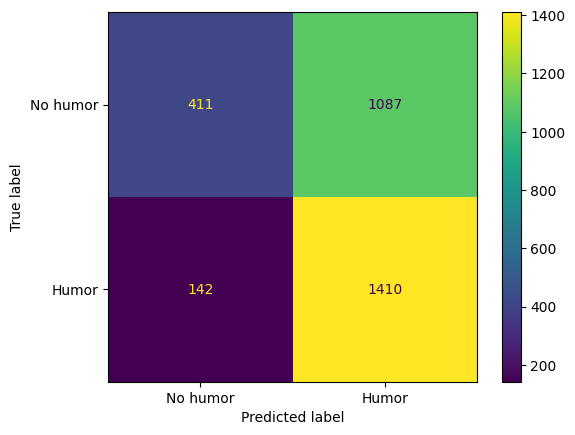

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(true_labels, votes)}\n")
print(f"Precision: {precision_score(true_labels, votes)}\n")
print(f"Recall: {recall_score(true_labels, votes)}\n")
cnf = confusion_matrix(true_labels, votes)
cnf_disp = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['No humor', 'Humor'])
cnf_disp.plot()